## Analysis of Democratic Articles

Having performed the analysis of articles about Republicans in the Topic_Separation_Rep notebook, this notebook performs exactly the same analysis on articles predominantly about Democrats.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dem_arts = pd.read_csv('dem_arts.csv')
dem_arts.drop('Unnamed: 0', axis=1, inplace=True)
dem_arts.head()

,id,republican,democrat,prop_rep,political,Unnamed: 0.1,title,publication,author,date,...,month,url,content,neg,neu,pos,compound,scaled_compound,pub_label,topic
0,17286,0,1,0.000000,1,3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,...,4.0,NaN,"Death may be the great equalizer, but it isn’t...",0.083333,0.815387,0.087933,0.0790,0.000221,4.0,0
1,17298,0,2,0.000000,2,15,"As Second Avenue Subway Opens, a Train Delay E...",New York Times,Emma G. Fitzsimmons,2017-01-02,...,1.0,NaN,Finally. The Second Avenue subway opened in Ne...,0.037264,0.882875,0.065958,4.3123,0.012037,4.0,0
2,17317,0,30,0.000000,30,29,The Afghan War and the Evolution of Obama - Th...,New York Times,Mark Landler,2017-01-17,...,1.0,NaN,WASHINGTON — President Obama’s advisers wre...,0.100900,0.819950,0.079125,-9.9825,-0.027864,4.0,0
3,17319,0,2,0.000000,2,31,Benjamin Netanyahu Questioned in Israel Graft ...,New York Times,Isabel Kershner,2017-01-03,...,1.0,NaN,JERUSALEM — Israeli police investigators qu...,0.070556,0.845178,0.062133,-0.2136,-0.000596,4.0,0
4,17335,5,7,0.416667,12,44,California Hires Eric Holder as Legal Bulwark ...,New York Times,Adam Nagourney,2017-01-05,...,1.0,NaN,LOS ANGELES — Girding for four years of pot...,0.042385,0.851731,0.067500,2.4826,0.006930,4.0,0


In [8]:
dem_arts.shape

(24984, 21)

There are 24,984 articles about Democrats, compared to 42,689 article about Republicans. This is still plenty of articles to perform the analysis, but the difference is interesting.

For the rest of this notebook, the plot on the left will be the one for the articles about Democrats, and the plot on the right will be the one for Republican articles, to allow easy comparison.

Text(0.5, 1.0, 'Articles from Each Publication (D)')

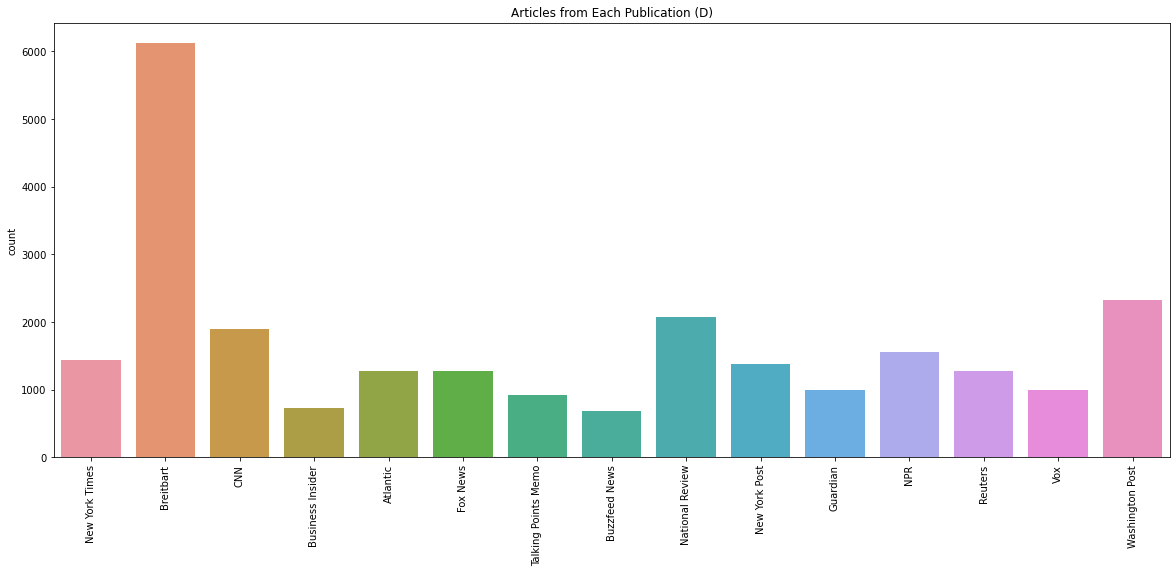

In [9]:
rep_arts=pd.read_csv('rep_arts.csv')
plt.figure(figsize=(20,8))

sns.countplot(x=dem_arts['publication'])
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Articles from Each Publication (D)')

#plt.subplot(1,2,2)
#sns.countplot(x=rep_arts['publication'])
#plt.xticks(rotation=90)
#plt.xlabel('')
#plt.title('Articles from Each Publication (R)');

For the most part, these are pretty similar, meaning that each publication wrote about the same proportion of articles on either party. Notably, Fox News appears to have written a higher proportion of articles about Democrats than about Republicans, and Talking Points Memo and Reuters seem to have written a higher proportion of articles about Republicans.

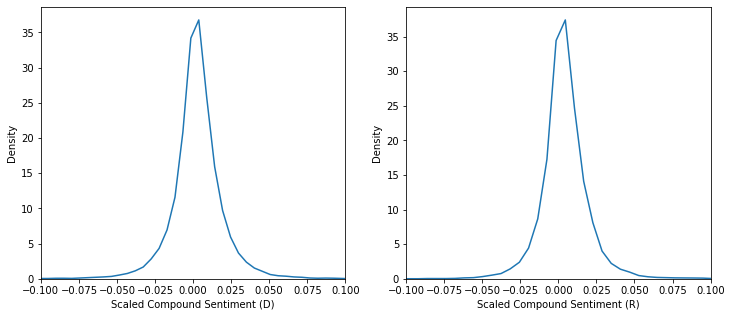

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(x=dem_arts['scaled_compound'])
plt.xlabel('Scaled Compound Sentiment (D)')
plt.ylabel('Density')
plt.xlim(-0.1, 0.1)

plt.subplot(1,2,2)
sns.kdeplot(x=rep_arts['scaled_compound'])
plt.xlabel('Scaled Compound Sentiment (R)')
plt.ylabel('Density')
plt.xlim(-0.1, 0.1);

The distirbution of scaled_compound sentiment intensity is nearly identical! Let's check the neutral intensity.

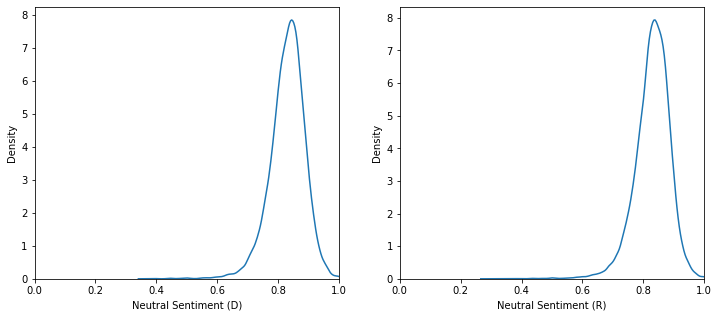

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(x=dem_arts['neu'])
plt.xlabel('Neutral Sentiment (D)')
plt.ylabel('Density')
plt.xlim(0, 1)

plt.subplot(1,2,2)
sns.kdeplot(x=rep_arts['neu'])
plt.xlabel('Neutral Sentiment (R)')
plt.ylabel('Density')
plt.xlim(0, 1);

These are quite similar as well.

In [12]:
dem_arts[['neg', 'pos', 'neu', 'scaled_compound']].describe()

,neg,pos,neu,scaled_compound
count,24984.000000,24984.000000,24984.000000,24984.000000
mean,0.063174,0.072124,0.830250,0.002566
std,0.035829,0.030899,0.058098,0.019272
min,0.000000,0.000000,0.364000,-0.687524
25%,0.037811,0.051147,0.798478,-0.004738
50%,0.058054,0.069609,0.835250,0.002290
75%,0.083200,0.090425,0.867500,0.010033
max,0.419182,0.273000,1.000000,0.335085


The articles about Democrats have a very different range in the scaled_compound column. While Republican articles had a minimum compound score of approximately -0.18, mildly negative, the articles about Democrats have a minimum of -0.69, STRONGLY negative! On the other side, there was an article about Republicans with a 1.0 compound score, indicating high praise, while the highest compound rating for Democrats is 0.335. 

In the Positive Intensity column, the highest positivity for Republicans is 0.332, while for Democrats it is 0.273; it appears that Republicans get more positive news coverage than Democrats, in general. Perhaps due to fatter tails in the sentiment distributions, which will be checked soon. 

First, let's see which article scored -0.6875 on scaled_compound; the most negative article of them all.

In [13]:
print('Negative Article Title: \n', dem_arts.loc[np.argmin(dem_arts['scaled_compound']), 'title'], '\n')
print("Negative Article Publication: \n", dem_arts.loc[np.argmin(dem_arts['scaled_compound']), 'publication'], '\n')
print("Negative Article Content: \n", dem_arts.loc[np.argmin(dem_arts['scaled_compound']), 'content'])


Negative Article Title: 
 ISIS: 143 attacks in 29 countries have killed 2,043 

Negative Article Publication: 
 CNN 

Negative Article Content: 
  (CNN) Since declaring its caliphate in June 2014, the   Islamic State has conducted or inspired more than 140 terrorist attacks in 29 countries other than Iraq and Syria, where its carnage has taken a much deadlier toll. Those attacks have killed at least 2, 043 people and injured thousands more. It can be difficult to divine the precise role that international terrorists play in this or that attack. For example, the person who killed four U. S. Marines and a sailor in Chattanooga, Tennessee, in July 2015 was ”motivated by foreign terrorist organization propaganda,” FBI Director James Comey said, though he added that it’s hard to say which terrorist group motivated the killer. It also can be hard to get precise information about some attacks, but it’s clear the deadly tentacles of ISIS have spread quickly from the terrorist group’s epicenter

The article is mostly about terrorism, ISIS, and violence, but includes a quote from President Obama. In this case, the article is classified as 'Democratic' because it only mentions a Democrat, President Obama, and the negativity comes from the use of President Obama's statement on a domestic terrorist in an article about an uptick in internation terrorism.

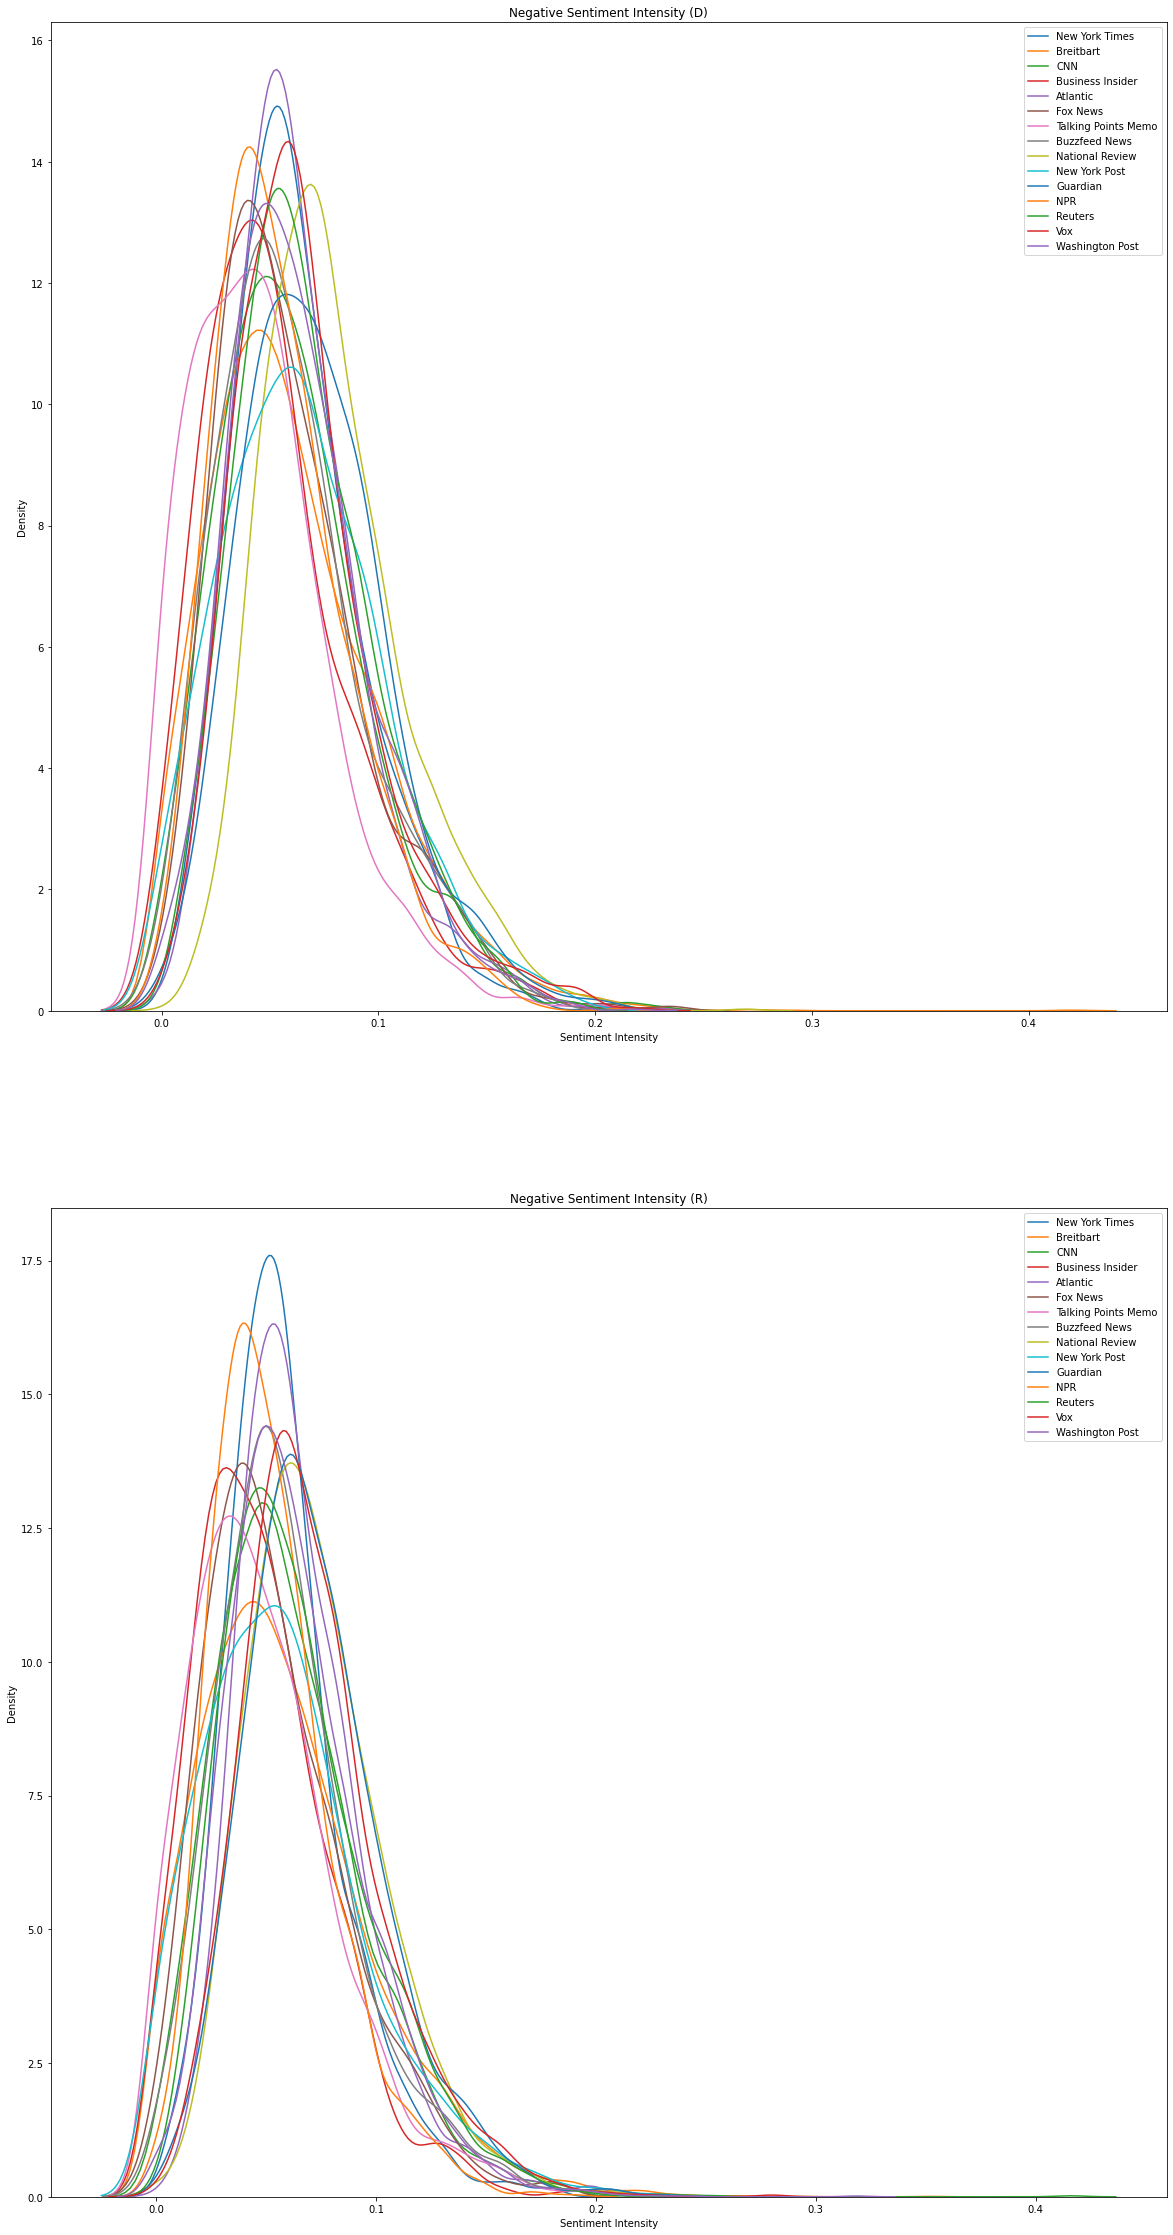

In [14]:
plt.figure(figsize=(20,40))
# KDE Plots of Sentiment...
plt.subplot(2,1,1)
dem_pubs = dem_arts['publication'].unique()
for pub in dem_pubs:
    sns.kdeplot(dem_arts.loc[dem_arts['publication'] == pub, 'neg'])
plt.xlabel('Sentiment Intensity')
plt.title("Negative Sentiment Intensity (D)")
plt.legend(dem_pubs)

plt.subplot(2,1,2)
rep_pubs = rep_arts['publication'].unique()
for pub in rep_pubs:
    sns.kdeplot(rep_arts.loc[rep_arts['publication'] == pub, 'neg'])
plt.xlabel('Sentiment Intensity')
plt.title('Negative Sentiment Intensity (R)')
plt.legend(rep_pubs);

For articles about Democrats, the highest peak negativity belongs to the Washington Post (it was the New York Times for Republicans). The furthest-right peak, indicating highest probability of negative article sentiment, belongs to the National Review. The tails for National Review clearly indicate stronger negative sentiment in those articles than any others. The farthest left tails, indicating high probability of lower negative intensity, belong to Talking Points Memo.

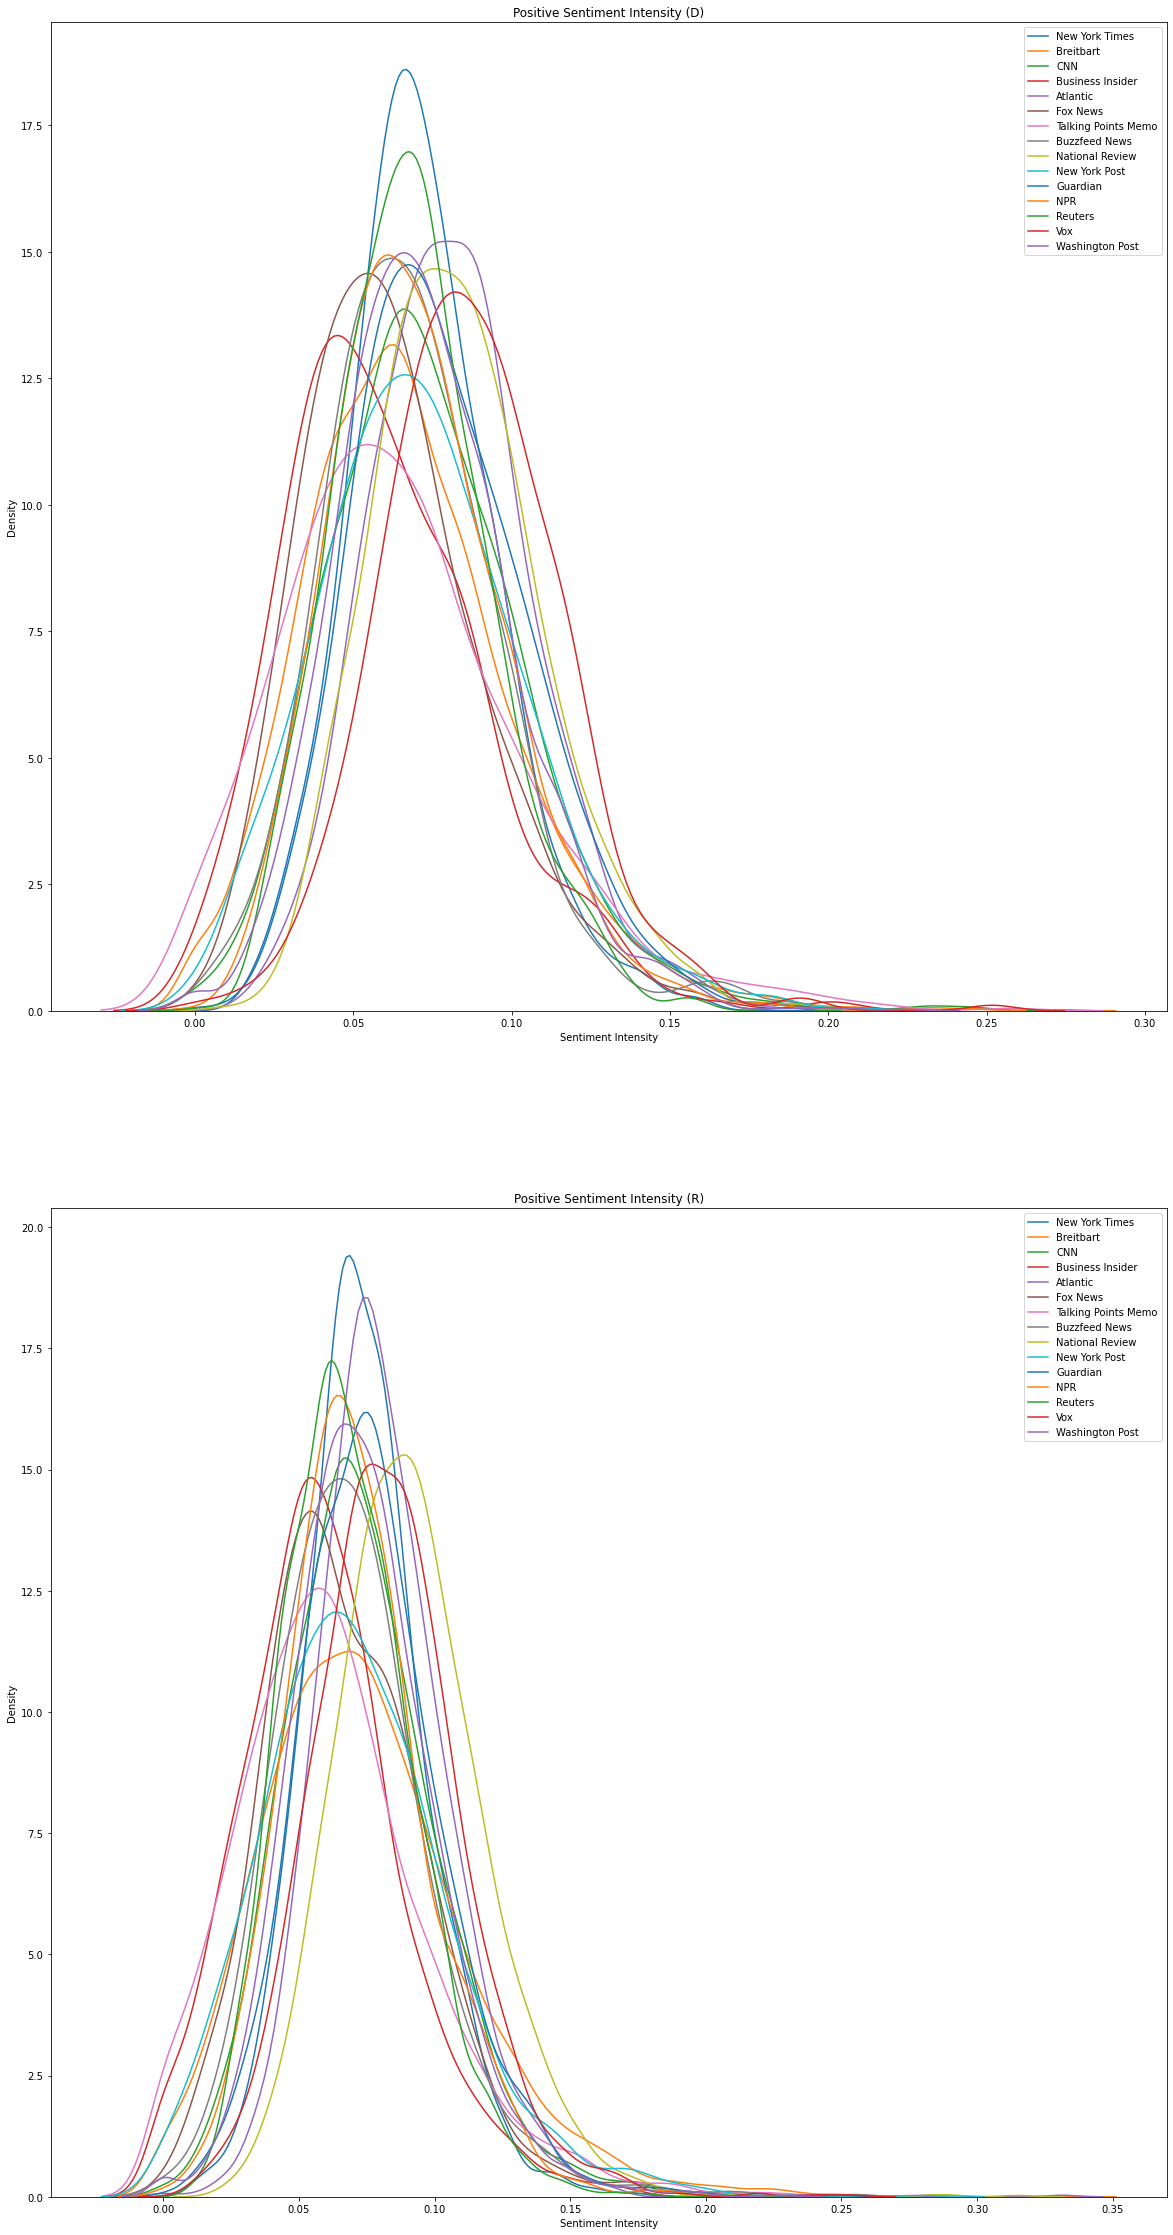

In [15]:
plt.figure(figsize=(20,40))
plt.subplot(2,1,1)
for pub in dem_pubs:
    sns.kdeplot(dem_arts.loc[dem_arts['publication'] == pub, 'pos'])
plt.xlabel('Sentiment Intensity')
plt.title('Positive Sentiment Intensity (D)')
plt.legend(dem_pubs)

plt.subplot(2,1,2)
for pub in rep_pubs:
    sns.kdeplot(rep_arts.loc[rep_arts['publication'] == pub, 'pos'])
plt.xlabel('Sentiment Intensity')
plt.title('Positive Sentiment Intensity (R)')
plt.legend(rep_pubs);

In positive sentiment, the highest peak for either Republicans or Democrats is the New York Times, and both peaks are centered near 0.08; weak sentiment. Both groups of articles have about the same spread.

The articles about Democrats have a second peak, quite near the first, from CNN. The farthest right peak and fattest right tail belongs to Vox; centered near 0.09. The left-most peak belongs to Businesss Insider, and the fattest left tail belongs to Talking Points Memo, which also has the lowest peak.

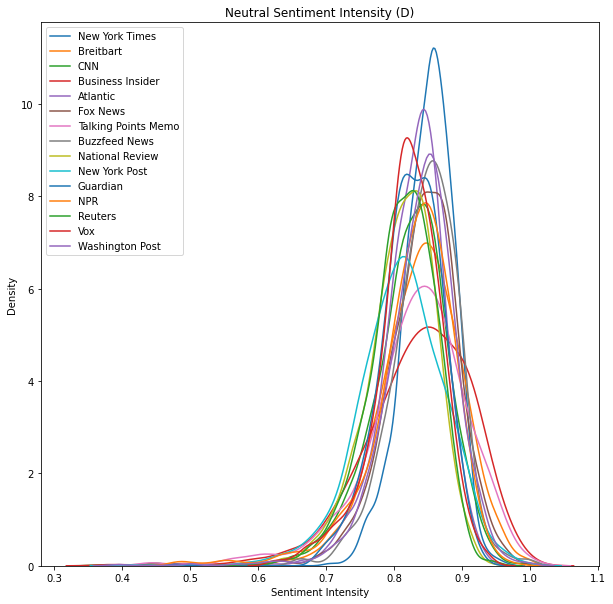

In [19]:
plt.figure(figsize=(10,10))

for pub in dem_pubs:
    sns.kdeplot(dem_arts.loc[dem_arts['publication'] == pub, 'neu'])
plt.xlabel('Sentiment Intensity')
plt.title('Neutral Sentiment Intensity (D)')
plt.legend(dem_pubs)

#plt.subplot(2,1,2)
#for pub in rep_pubs:
#    sns.kdeplot(rep_arts.loc[rep_arts['publication'] == pub, 'neu'])
#plt.xlabel('Sentiment Intensity')
#plt.title('Neutral Sentiment Intensity (R)')
#plt.legend(rep_pubs);

These two distributions are quite similar. They both have a highest peak, from the New York Times, near 0.9; they both have a lowest peak, from Business Insider, near 0.83; Business Insider has fat tails in both: The fattest right tail for Republicans and the fattest left tail for Democrats. The farthest left tail in articles about Democrats is from the New York Post, which also has the left-most peak. 

(-0.1, 0.1)

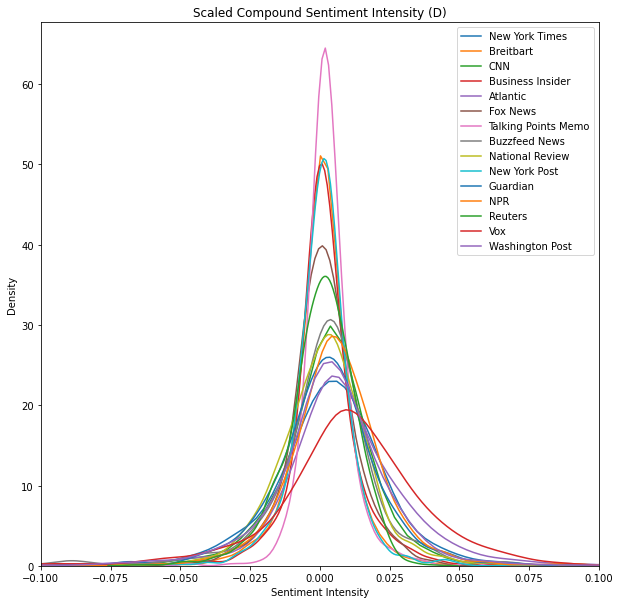

In [20]:
plt.figure(figsize=(10,10))
#plt.subplot(2,1,1)
for pub in dem_pubs:
    sns.kdeplot(dem_arts.loc[dem_arts['publication'] == pub, 'scaled_compound'])
plt.xlabel('Sentiment Intensity')
plt.title('Scaled Compound Sentiment Intensity (D)')
plt.legend(dem_pubs)
plt.xlim(-0.1,0.1)

#plt.subplot(2,1,2)
#for pub in rep_pubs:
#    sns.kdeplot(rep_arts.loc[rep_arts['publication'] == pub, 'scaled_compound'])
#plt.xlabel('Sentiment Intensity')
#plt.title('Scaled Compound Sentiment Intensity (R)')
#plt.legend(rep_pubs)
#plt.xlim(-0.1,0.1);

The most interesting thing about the distribution of scaled_compound sentiment intensity is Vox clearly has a more positive scaled_compound score in articles about Democrats than any other publication. Vox also has a slightly positive scaled_compound sentiment in articles about Republicans.

Let's look at a table of mean sentiment intensities by publication.

In [59]:
dem_arts[['publication', 'neg', 'pos', 'neu', 'scaled_compound']].groupby('publication').mean().sort_values('scaled_compound')

,neg,pos,neu,scaled_compound
publication,,,,
Reuters,0.066669,0.069180,0.811581,0.000174
Breitbart,0.061511,0.067723,0.839175,0.000505
Fox News,0.060263,0.062560,0.841950,0.000847
New York Post,0.065378,0.071507,0.810624,0.000920
Buzzfeed News,0.059685,0.068573,0.845506,0.001295
National Review,0.079736,0.083561,0.810142,0.001419
CNN,0.061152,0.073307,0.822259,0.002049
Guardian,0.071388,0.078481,0.824488,0.002105
Business Insider,0.052816,0.059914,0.834822,0.002152


Atlantic had the highest mean scaled_compound score for Republican articles, and is second, behind Vox, for highest mean scaled_compound score in Democratic articles. The New York Times has the highest mean neutrallity score in both articles groups. 

Vox has the highest mean positive sentiment intensity for articles about Democrats, but the National Review, a noted conservative editorial magazine, is a close second. National Review also has the highest mean negative sentiment intensity. National Review must be quite emotional in articles that are predominantly about Democrats; it also has the lowest mean neutrallity.

All of the publications have a slightly positive scaled_compound score; Reuters is closest to zero, followed by Breitbart, Fox News, and then the New York Post. Reuters also had the scaled_compound score closest to zero for articles about Republicans.

Let's try the same for the median.

In [60]:
dem_arts[['publication', 'neg', 'pos', 'neu', 'scaled_compound']].groupby('publication').median().sort_values('scaled_compound')


,neg,pos,neu,scaled_compound
publication,,,,
Fox News,0.052991,0.059065,0.846038,0.000976
Breitbart,0.054789,0.064182,0.842442,0.001021
Business Insider,0.046911,0.055267,0.843566,0.001101
New York Post,0.062033,0.069553,0.812900,0.001109
Reuters,0.061882,0.067750,0.815727,0.001273
National Review,0.074111,0.081290,0.815439,0.002064
Talking Points Memo,0.041375,0.060625,0.837812,0.002180
Guardian,0.067922,0.074818,0.827318,0.002767
Buzzfeed News,0.053317,0.066959,0.850164,0.002850


This is really different from the median sentiments for articles about Republicans. For Republicans, the lowest scaled_compound score was Talking Points Memo with 0.001747; here, it is Fox News with 0.000976; the lowest median scaled_compound score for Democrats is nearly ***half*** of that for Republicans. The New York Post is in the bottom 4 publications by scaled_compound score for both groups.

For Republican articles, the New York Times had the highest scaled_compound score, with 0.007725, but for Demoractic articles it is Vox with 0.010673. The range of median scaled_compound scores for Democrats is larger than that for Republicans.

National Review has the highest median negative sentiment intensity and second-highest median positive sentiment intensity, after Vox. 

The New York Times has the highest neutrallity score for both groups, around 0.85 both times, followed closely by Buzzfeed News in both cases. The New York Post has the lowest median neutrallity score in articles about Democrats, while the National Review has the lowest median neutrallity score in articles about Republicans; the scores are 0.812 and 0.816 respectively.

Next, the standard deviation.

In [61]:
dem_arts[['publication', 'neg', 'pos', 'neu', 'scaled_compound']].groupby('publication').std().sort_values('scaled_compound')

,neg,pos,neu,scaled_compound
publication,,,,
Talking Points Memo,0.032835,0.038561,0.077601,0.011110
New York Post,0.037589,0.032667,0.064632,0.011446
Reuters,0.032361,0.024472,0.049593,0.012620
Business Insider,0.034402,0.031857,0.079740,0.013025
Fox News,0.035292,0.029005,0.051960,0.013607
Breitbart,0.039979,0.033926,0.059701,0.014840
National Review,0.033616,0.027209,0.050806,0.016769
NPR,0.031211,0.028025,0.064049,0.019214
Guardian,0.034095,0.027825,0.045461,0.019861


Talking Points Memo is quite consistent in scaled_compound score, but varies second-most widely in neutrallity score (behind Business Insider). 

The New York Times is, once again, the most consistent publication; it has the lowest standard deviation in neutrallity score, positive sentiment intensity, and negative sentiment intensity.

## ANOVA and Linear Regression

To see a discussion of the assumptions underlying an ANOVA, see the same section in Topic_Separation_Rep. Here, we are just going to do it, check the residuals, and fix what needs fixing. There will be little discussion.

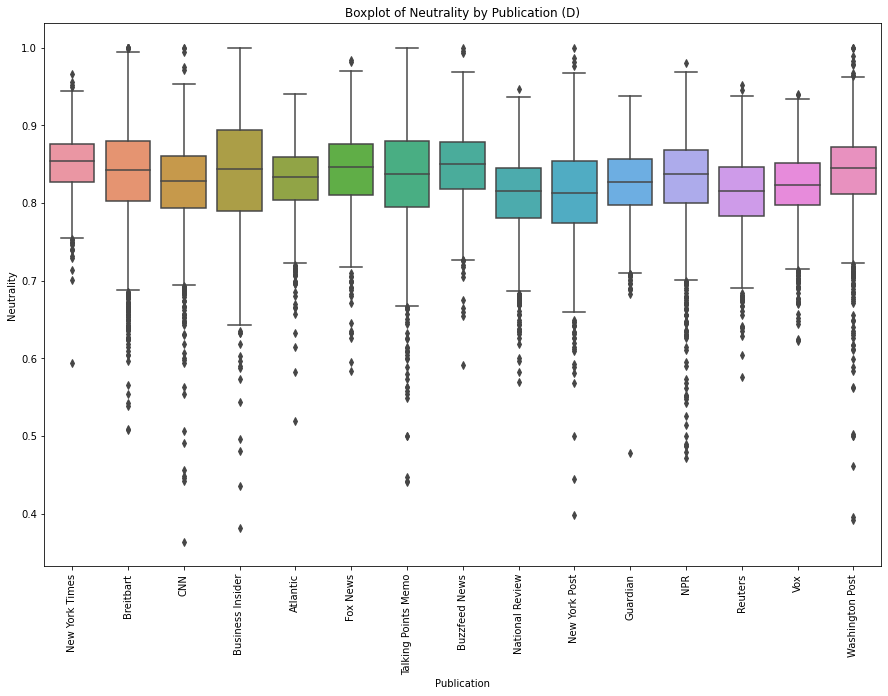

In [63]:
plt.figure(figsize=(15,10))
sns.boxplot(x='publication', y='neu', data=dem_arts)
plt.xticks(rotation=90)
plt.xlabel('Publication')
plt.ylabel('Neutrality')
plt.title('Boxplot of Neutrality by Publication (D)')
plt.show();

Interestingly, Atlantic and the Guardian have no high outliers, only low ones. But the point of the boxplot is to look for signs of heteroscedasticity and see if there is any obvious difference between groups. Nothing in this boxplot appears problematic.

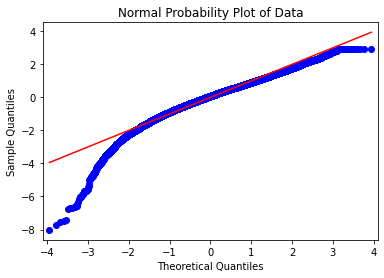

In [64]:
from statsmodels.graphics.gofplots import qqplot

neutrality_scaled = (dem_arts['neu'] - dem_arts['neu'].mean()) / dem_arts['neu'].std()
qqplot(neutrality_scaled, line='s')
plt.title('Normal Probability Plot of Data')
plt.show();

This normal probability plot is quite similar to the one from the Republican analysis; it didn't look great, but ultimately there was no issue in the residuals. We will do the Bartlett test anyway, but remember it doesn't matter too much right now. It will matter in the residuals.

In [66]:
import pingouin as pngn

pngn.homoscedasticity(data=dem_arts, dv='neu', group='publication', method='bartlett')

,T,pval,equal_var
bartlett,1348.18834,2.309350e-279,False


Output of the Bartlett test is nearly identical to that from the Republican analysis.

Let's move on.

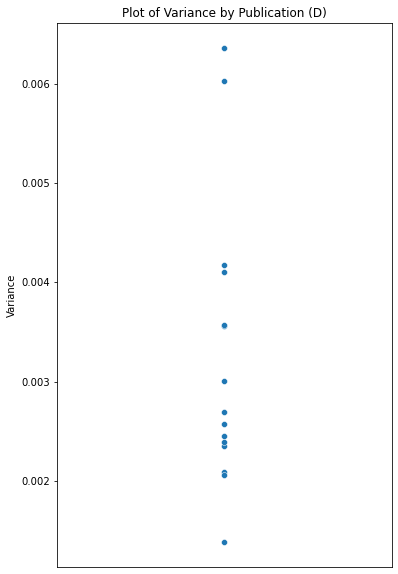

In [67]:
plt.figure(figsize=(6,10))
sns.scatterplot(y=dem_arts.groupby('publication')['neu'].var(), x=1)
plt.title('Plot of Variance by Publication (D)')
plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
plt.ylabel('Variance')
plt.show();

The variances are certainly different between groups, but in the Republican articles that difference did not end up invalidating the model.

Let's check if things change over time...

In [68]:
dem_arts['date'] = pd.to_datetime(dem_arts['date'])
dem_arts = dem_arts.sort_values('date')

grouped_dem = dem_arts.groupby(['publication', 'date']).mean()

In [69]:
grouped_dem_trimmed = dem_arts[dem_arts['date'] > '2016-01-01'].groupby(['publication', 'date']).mean()


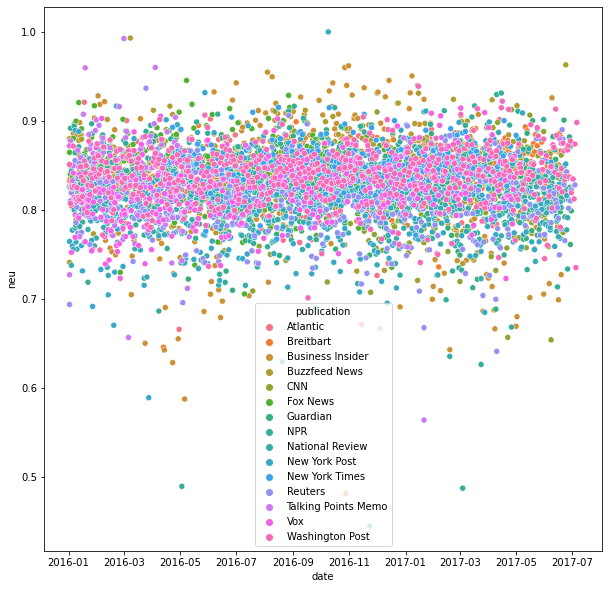

In [72]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='date', y='neu', hue='publication', data=grouped_dem_trimmed);

From this plot, it looks like the sentiments are stationary and it actually seems like there shouldn't be any variance issues. Let's look at each publication separately.

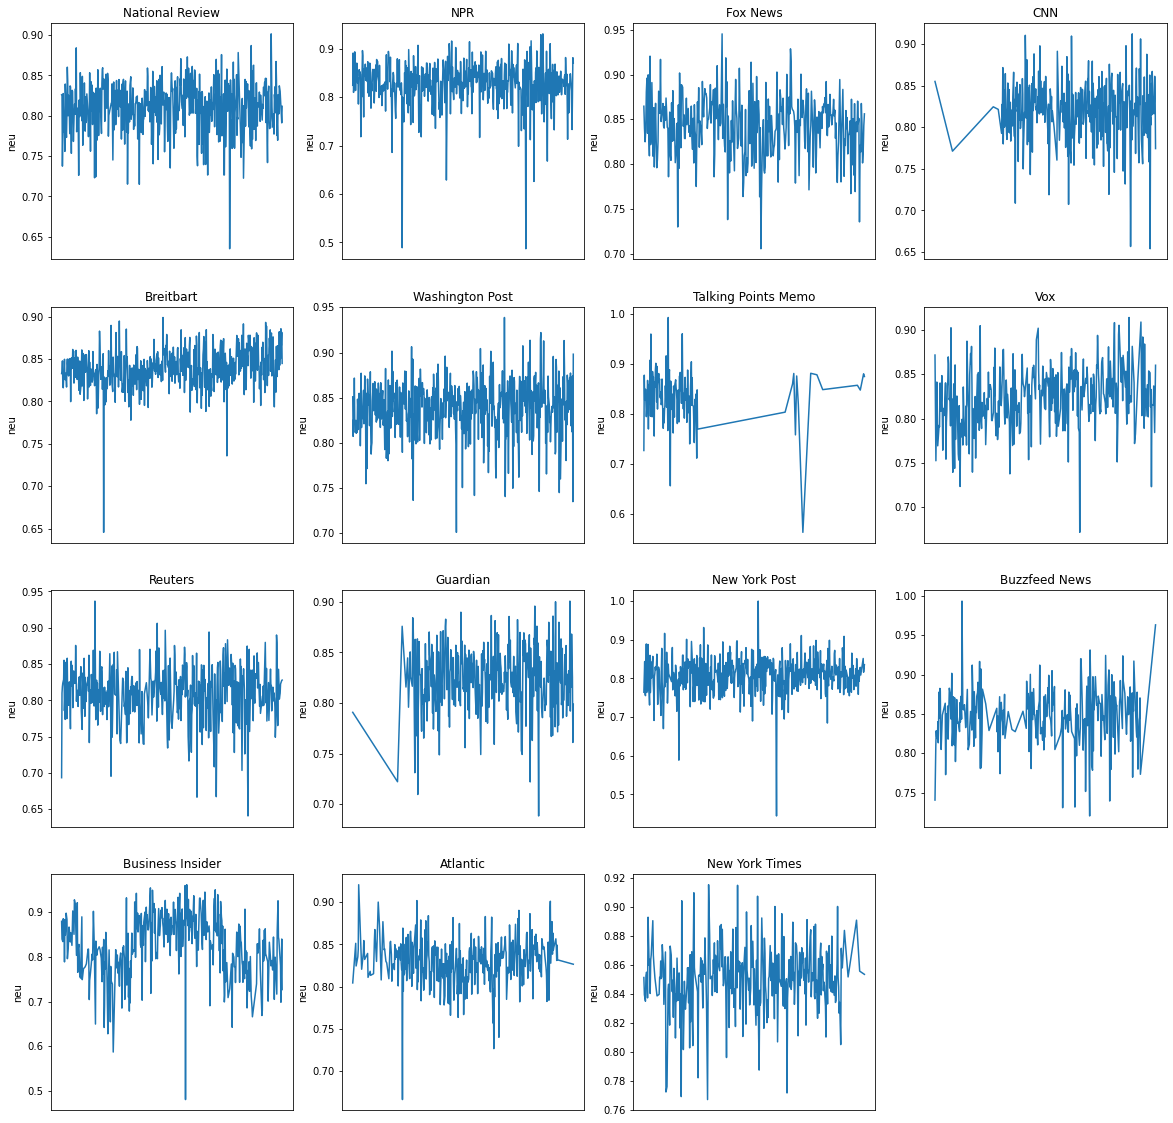

In [73]:
i = 1
plt.figure(figsize=(20,20))
for publication in dem_arts['publication'].unique():
    plt.subplot(4,4,i)
    plt.title(publication)
    plt.tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
    temp_data = grouped_dem_trimmed.loc[publication, :]
    sns.lineplot(x='date', y='neu', data=temp_data)
    i += 1

All of these plots look find. Business Insider has an interesting down section that appears to be mid-2016, and Talking Points Memo has all of its data at the beginning of the time period, but there is no problem. We do not need to include a blocking variable for the date.

In [74]:
dem_arts['year'] = [day.year for day in dem_arts['date']]

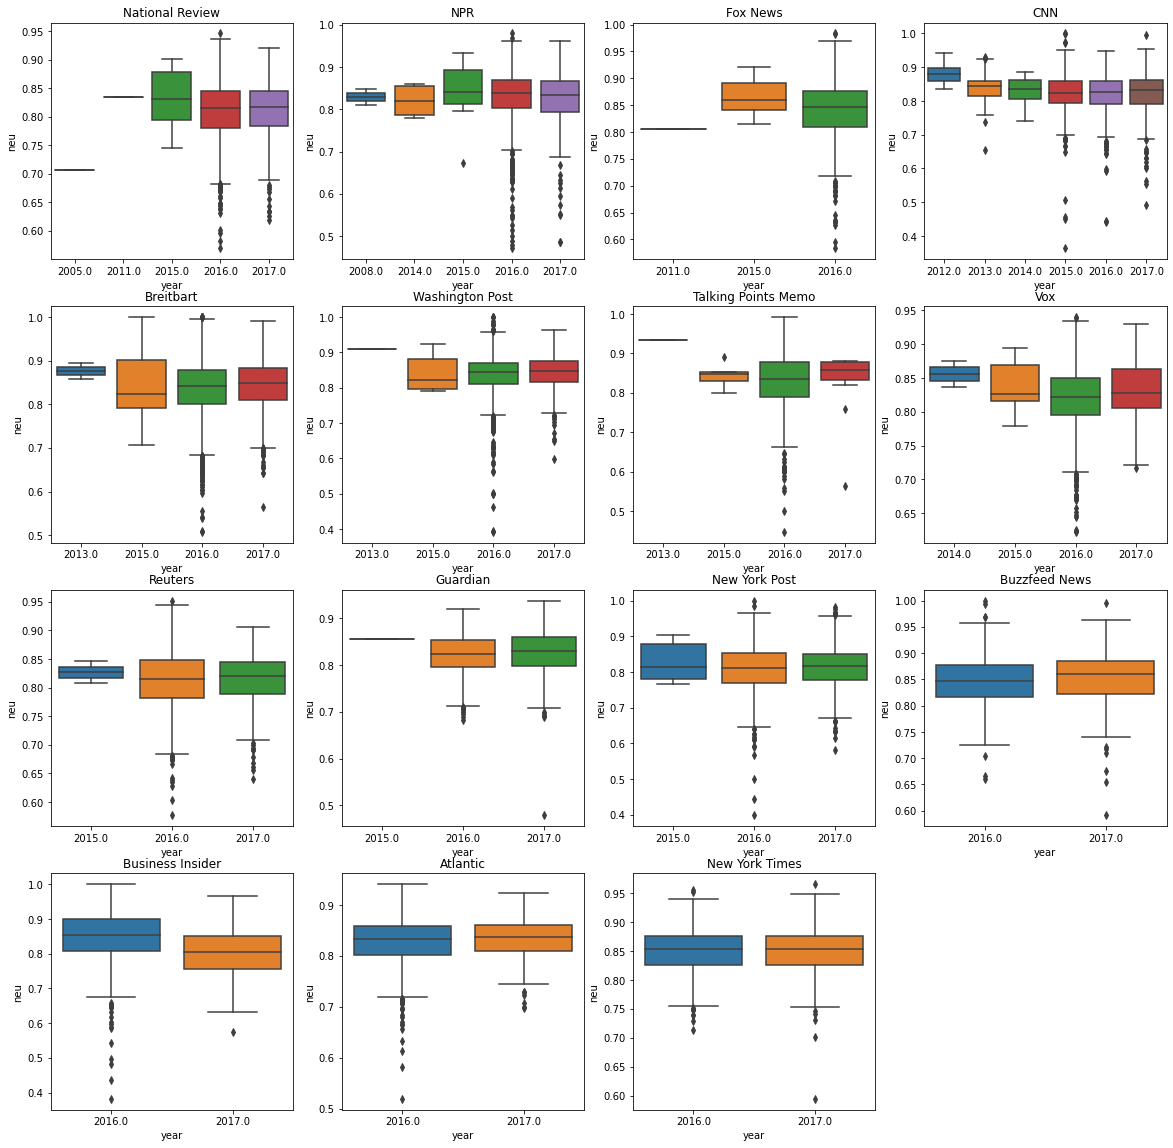

In [75]:
plt.figure(figsize=(20,20))
i = 1
for publication in dem_arts['publication'].unique():
    plt.subplot(4,4,i)
    plt.title(publication)
    sns.boxplot(x = 'year', y='neu', data=dem_arts.loc[dem_arts['publication'] == publication, ['year','neu']]);
    i += 1

These boxplots by year show much more variation in neutrallity in articles about Democrats than in the boxplots for Republicans. The New York Times was once again the most stable, but most other publications show movement either in median or in variance over the years. Most of the medians move downward; publications were often less neutral in articles about Democrats in 2017 versus 2016 or earlier.

In [79]:
dem_trimmed = dem_arts[dem_arts['date'] > '2016-01-01']

In [88]:
import statsmodels.formula.api as smf

linreg = smf.ols("neu ~ C(publication)", data=dem_trimmed).fit()

In [89]:
import statsmodels.api as sm
sm.stats.anova_lm(linreg)

,df,sum_sq,mean_sq,F,PR(>F)
C(publication),14.0,3.638930,0.259924,81.820222,4.011039e-230
Residual,23939.0,76.048564,0.003177,NaN,NaN


In [90]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    neu   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     81.82
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          4.01e-230
Time:                        12:07:25   Log-Likelihood:                 34909.
No. Observations:               23954   AIC:                        -6.979e+04
Df Residuals:                   23939   BIC:                        -6.967e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.8280      0.002    526.399      0.000       0.825       0.831
C(publication)[T.Breitbart]               0.0112      0.002      6.455      0.000       0.008       0.015
C(publication)[T.Business Insider]        0.0068      0.003      2.619      0.009       0.002       0.012
C(publication)[T.Buzzfeed News]           0.0175      0.003      6.552      0.000       0.012       0.023
C(publication)[T.CNN]                    -0.0061      0.002     -2.761      0.006      -0.010      -0.002
C(publication)[T.Fox News]                0.0139      0.002      6.220      0.000       0.010       0.018
C(publication)[T.Guardian]               -0.0036      0.002     -1.526      0.127      -0.008       0.001
C(publication)[T.NPR]                    -0.0011      0.002     -0.492      0.622      -0.005       0.003
C(publication)[T.National Review]        -0.0180      0.002     -8.960      0.000      -0.022      -0.014
C(publication)[T.New York Post]          -0.0174      0.002     -7.977      0.000      -0.022      -0.013
C(publication)[T.New York Times]          0.0222      0.002     10.270      0.000       0.018       0.026
C(publication)[T.Reuters]                -0.0165      0.002     -7.383      0.000      -0.021      -0.012
C(publication)[T.Talking Points Memo]     0.0003      0.003      0.101      0.919      -0.005       0.006
C(publication)[T.Vox]                    -0.0083      0.002     -3.474      0.001      -0.013      -0.004
C(publication)[T.Washington Post]         0.0104      0.002      5.294      0.000       0.007       0.014
==============================================================================
Omnibus:                     4167.790   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13236.370
Skew:                          -0.893   Prob(JB):                         0.00
Kurtosis:                       6.174   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ANOVA output tells us that the publication does have a statistically significant effect on neutrallity score in articles about Democrats. The New York Times has the highest coefficient, indicating that articles on Democrats from that source are, on average, 0.022 points *more neutral* than the average article. On the other hand, articles from the National Review are on averae 0.018 points *less neutral* than the average article. 

Talking Points Memo had a very high p-value, 0.919, indicating that the expected neutrallity score from this publication is statistically inseparable from the average neutrallity. Similarly, NPR has a p-value of 0.622. The Guardian has a p-value of 0.127; higher than most typical significance levels, but not exhorbitantly high.

Let's check residuals.

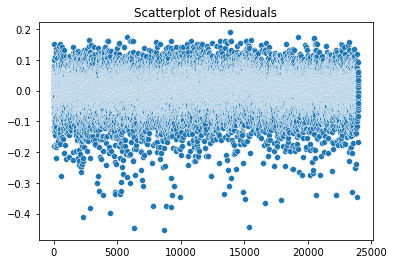

In [91]:
sns.scatterplot(x=range(len(linreg.resid)), y=linreg.resid)
plt.title('Scatterplot of Residuals');

There are a few low outliers, but generally the residuals are centered around zero and look good.

In [92]:
from IPython.display import display, Math

res_mean = np.mean(linreg.resid)
res_sd = np.std(linreg.resid)
res_se = res_sd / np.sqrt(len(linreg.resid))
ci_L = res_mean - 1.96*res_se
ci_U = res_mean + 1.96*res_se

print('Confidence Interval for Mean of Residuals')
display(Math('{} < \mu < {}'.format(round(ci_L,4), round(ci_U,4))))

Confidence Interval for Mean of Residuals


<IPython.core.display.Math object>

The confidence interval for the mean of residuals has zero right in the middle; another good sign.

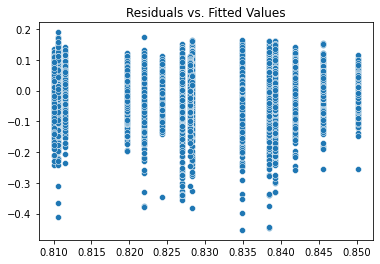

In [93]:
sns.scatterplot(x=linreg.fittedvalues, y=linreg.resid)
plt.title("Residuals vs. Fitted Values");

The plot of residuals versus fitted values does not show any trumpeting or other problematic behavior.

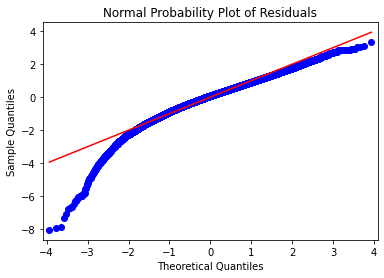

In [94]:
res_scaled = (linreg.resid - np.mean(linreg.resid)) / np.std(linreg.resid)
qqplot(res_scaled, line='s')
plt.title('Normal Probability Plot of Residuals')
plt.show();

This normal probability plot shows the low outliers, and is quite similar to the one from the Republican analysis, where we concluded that it was not a problem.

### Scaled_compound Analysis

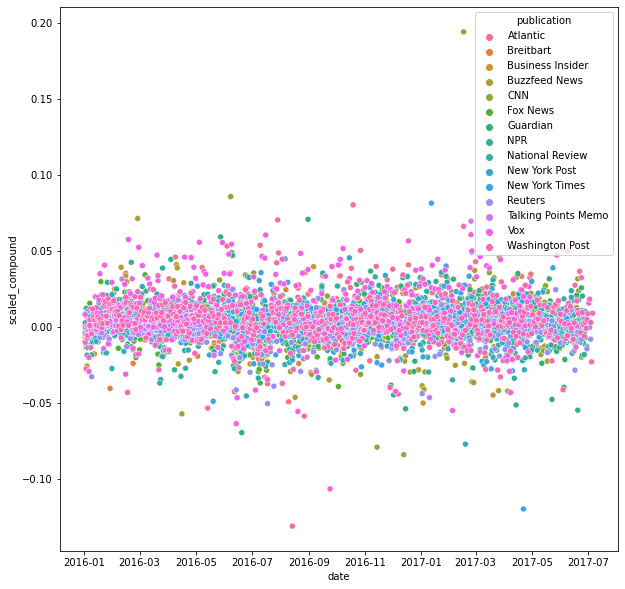

In [95]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='date', y='scaled_compound', hue='publication', data=grouped_dem_trimmed);

The spread for scaled_compound score is much tighter than that for neutrallity score. It also seems stationary. Let's check lineplots for each publication.

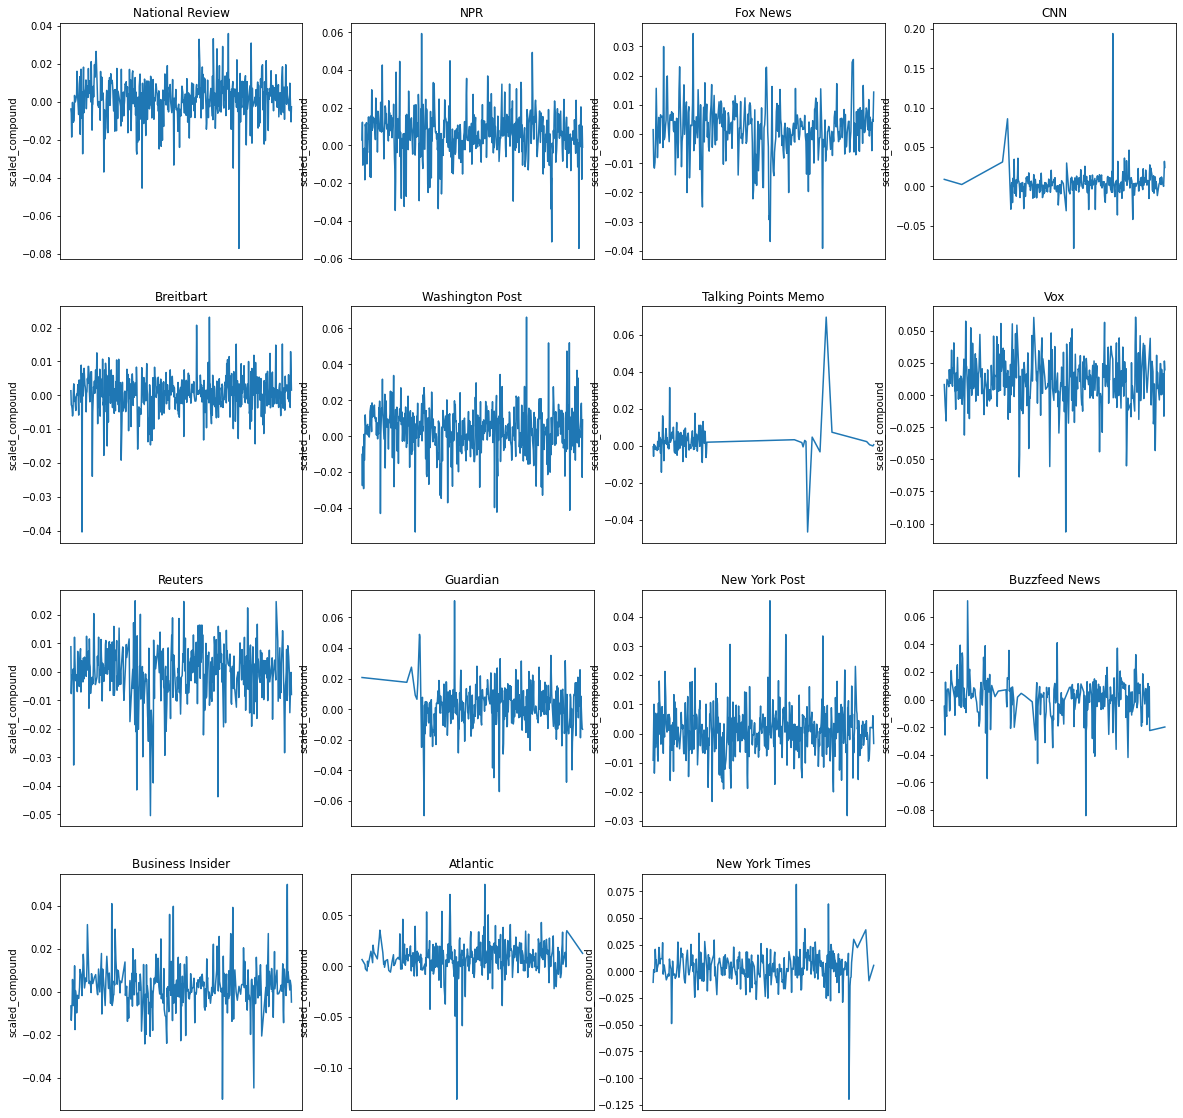

In [96]:
i = 1
plt.figure(figsize=(20,20))
for publication in dem_arts['publication'].unique():
    plt.subplot(4,4,i)
    plt.title(publication)
    plt.tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
    temp_data = grouped_dem_trimmed.loc[publication, :]
    sns.lineplot(x='date', y='scaled_compound', data=temp_data)
    i += 1

Thee plots looks good; nice and stationary. No need to control for the date in the ANOVA.

In [97]:
linreg2 = smf.ols('scaled_compound ~ C(publication) + 0', data=dem_trimmed).fit()
sm.stats.anova_lm(linreg2)

,df,sum_sq,mean_sq,F,PR(>F)
C(publication),15.0,0.343111,0.022874,66.63881,3.264985e-199
Residual,23939.0,8.217167,0.000343,NaN,NaN


In [98]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        scaled_compound   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     37.69
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          1.93e-102
Time:                        12:16:29   Log-Likelihood:                 61559.
No. Observations:               23954   AIC:                        -1.231e+05
Df Residuals:                   23939   BIC:                        -1.230e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(publication)[Atlantic]                0.0089      0.001     17.148      0.000       0.008       0.010
C(publication)[Breitbart]               0.0005      0.000      2.056      0.040    2.29e-05       0.001
C(publication)[Business Insider]        0.0022      0.001      3.148      0.002       0.001       0.003
C(publication)[Buzzfeed News]           0.0013      0.001      1.823      0.068   -9.77e-05       0.003
C(publication)[CNN]                     0.0027      0.001      5.242      0.000       0.002       0.004
C(publication)[Fox News]                0.0009      0.001      1.748      0.080      -0.000       0.002
C(publication)[Guardian]                0.0022      0.001      3.674      0.000       0.001       0.003
C(publication)[NPR]                     0.0059      0.000     12.495      0.000       0.005       0.007
C(publication)[National Review]         0.0014      0.000      3.407      0.001       0.001       0.002
C(publication)[New York Post]           0.0009      0.000      1.769      0.077   -9.52e-05       0.002
C(publication)[New York Times]          0.0037      0.000      7.514      0.000       0.003       0.005
C(publication)[Reuters]                 0.0002      0.001      0.400      0.689      -0.001       0.001
C(publication)[Talking Points Memo]     0.0032      0.001      4.258      0.000       0.002       0.005
C(publication)[Vox]                     0.0107      0.001     18.110      0.000       0.010       0.012
C(publication)[Washington Post]         0.0032      0.000      8.394      0.000       0.002       0.004
==============================================================================
Omnibus:                    10027.845   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1404988.856
Skew:                          -0.975   Prob(JB):                         0.00
Kurtosis:                      40.468   Cond. No.                         3.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ANOVA again tells us that the publication has a statistically significant effect on the scaled_compound score. 

The linear regression table shows Reuters with a p-value of 0.689, indicating no evidence that the publication has a scaled_compound score different from zero. This is the only publication with a zero-coefficient. 

The New York Post as a p-value of 0.077; Fox News has a p-value of 0.08; Buzzfeed News has a p-value of 0.068; but all of these are below a reasonable significance level of $\alpha=0.1$. 

Every publication has a positive coefficient, but for articles on Democrats, there is one publication with a zero coefficient (all coefficients for Republicans were positive and non-zero), and three publications with p-values above 0.05 (none for Republicans). From this table, we can conclude that Republicans get *very slightly* more positive media coverage, on average, than Democrats.

Let's check these residuals, too.

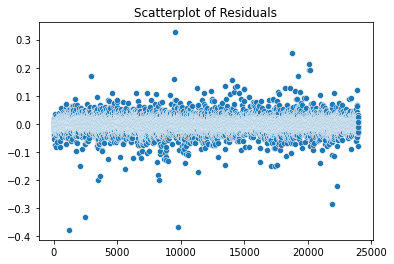

In [99]:
sns.scatterplot(x=range(len(linreg2.resid)), y=linreg2.resid)
plt.title("Scatterplot of Residuals");

Thee residuals are centered around zero, and look even better than the residuals from the Republican analysis!

In [100]:
res2_mean = np.mean(linreg2.resid)
res2_std = np.std(linreg2.resid)
res2_se = res2_std / np.sqrt(len(linreg2.resid))
ci2_L = res2_mean - 1.96*res2_se
ci2_U = res2_mean + 1.96*res2_se

print("Confidence Interview for Residual Mean")
display(Math('{} < \mu < {}'.format(round(ci2_L,4), round(ci2_U,4))))

Confidence Interview for Residual Mean


<IPython.core.display.Math object>

Good. There is a tight confidence interval, centered around zero, for the mean of the residuals.

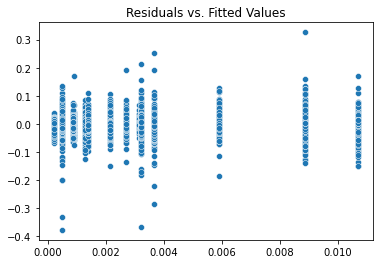

In [101]:
sns.scatterplot(x=linreg2.fittedvalues, y=linreg2.resid)
plt.title('Residuals vs. Fitted Values');

The residuals, plotted against fitted values, appear to show reasonably-equal variance; no problems.

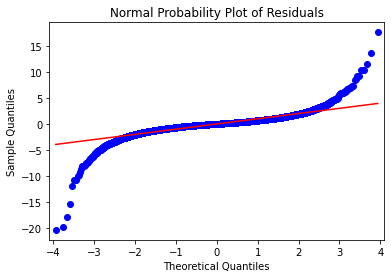

In [102]:
res2_scaled = (linreg2.resid - np.mean(linreg2.resid)) / np.std(linreg2.resid)
qqplot(res2_scaled, line='s')
plt.title('Normal Probability Plot of Residuals')
plt.show();

The normal probability plot shows a common bit of fatness in the tails. This should not be an issue, as it doesn't happen until well into the 3rd quantile in either direction.

## Tukey Test and Measure of the DIfferences

This part is also quite similar to that from the Republican analysis; for more detail in the assumptions and mathematics, see the Topic_Separation_Rep notebook.

In [103]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(dem_trimmed['neu'], dem_trimmed['publication'], alpha=0.001)
print(tukey_results.summary())

             Multiple Comparison of Means - Tukey HSD, FWER=0.00              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           Atlantic           Breitbart   0.0112  0.001  0.0035  0.0188   True
           Atlantic    Business Insider   0.0068 0.3583 -0.0047  0.0183  False
           Atlantic       Buzzfeed News   0.0175  0.001  0.0057  0.0293   True
           Atlantic                 CNN  -0.0061 0.2688 -0.0159  0.0036  False
           Atlantic            Fox News   0.0139  0.001   0.004  0.0237   True
           Atlantic            Guardian  -0.0036    0.9 -0.0141  0.0069  False
           Atlantic                 NPR  -0.0011    0.9 -0.0105  0.0084  False
           Atlantic     National Review   -0.018  0.001 -0.0268 -0.0091   True
           Atlantic       New York Post  -0.0174  0.001 -0.0271 -0.0078   True
           Atlantic      New York Times   0.0222  0.

This Tukey table allows us to compare any two publications by mean neutrallity rating. For example, the New York Times is significantly more neutral in articles about Democrats than Atlantic (a difference of only 0.022 points). 

The only especially interesting pattern I see is that that New York Times has a higher mean neutrallity score in articles about Democrats than any publication other than Fox News and Buzzfeed News. To see how any two publications compare, find the pair in the first two columns; if the third column is positive, the second publication has a highest neutrallity score, and if the last column says **True**, then that neutrallity score is statistically different. If the last columns says **False**, then we cannot conclude that there is really a difference between the two publications.

Let's do the same test for scaled_compound score.

In [105]:
tukey_results2 = pairwise_tukeyhsd(dem_trimmed['scaled_compound'], dem_trimmed['publication'], alpha=0.001)
print(tukey_results2.summary())

             Multiple Comparison of Means - Tukey HSD, FWER=0.00              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           Atlantic           Breitbart  -0.0084  0.001 -0.0109 -0.0059   True
           Atlantic    Business Insider  -0.0067  0.001 -0.0105 -0.0029   True
           Atlantic       Buzzfeed News  -0.0076  0.001 -0.0114 -0.0037   True
           Atlantic                 CNN  -0.0062  0.001 -0.0094  -0.003   True
           Atlantic            Fox News   -0.008  0.001 -0.0112 -0.0047   True
           Atlantic            Guardian  -0.0067  0.001 -0.0102 -0.0033   True
           Atlantic                 NPR  -0.0029 0.0025  -0.006  0.0001  False
           Atlantic     National Review  -0.0075  0.001 -0.0104 -0.0046   True
           Atlantic       New York Post   -0.008  0.001 -0.0112 -0.0048   True
           Atlantic      New York Times  -0.0052  0.

Right off the bat, we see that Atlantic has a higher scaled_compound score than any publication other than Vox and NPR.

* Business Insider is only different from Atlantic, Vox, and NPR
* Buzzfeed News is only different from Atlantic, Vox, and NPR
* CNN is only different from Atlantic, Vox, and NPR
* Fox News is only different from Atlantic, Vox, and NPR
* Guardian is only different from Atlantic, Vox, and NPR
* NPR has a higher scaled_compound score than National Review, the New York Post, and Reuters, but lower than Vox
* National Review is only different from Vox
* The New York Post is only different from Vox
* The New York Times has a scaled_compound score lower than Vox but higher than Reuters
* Reuters has a lower scaled_compound score than the New York Times, NPR, Vox, and the Washington Post
* Talking Points Memo has a lower scaled_compound score than Vox
* Vox has a higher scaled_compound score than almost anyone

Let's look at a plot of these mean scores, with labels, so we can see where each publication lies in relation to each other.

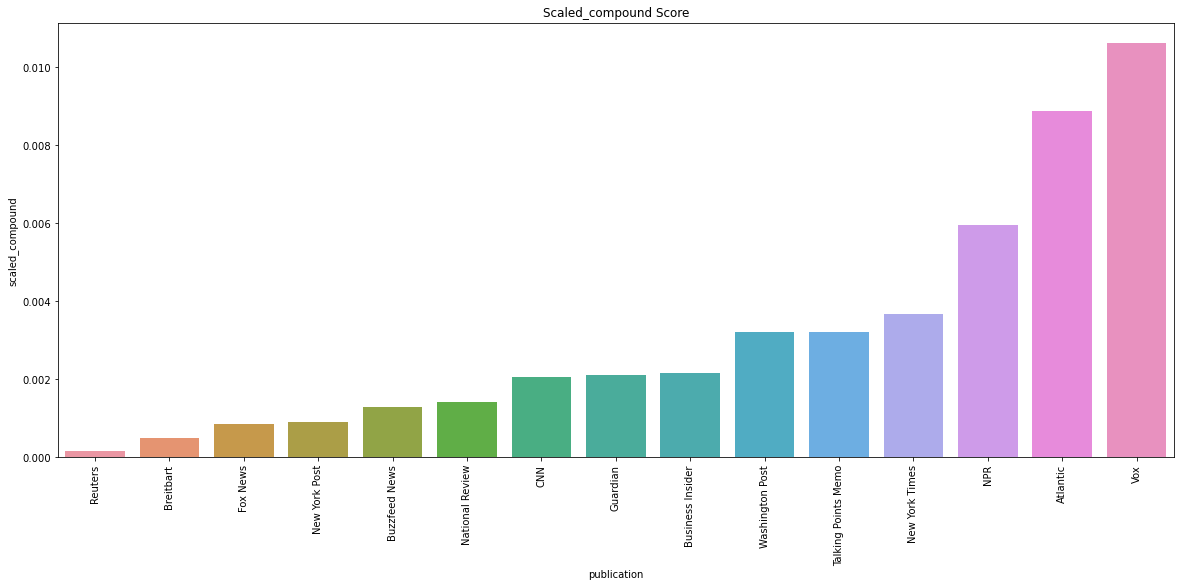

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(x=dem_arts.groupby('publication')['scaled_compound'].mean().sort_values().index,
           y=dem_arts.groupby('publication')['scaled_compound'].mean().sort_values())
plt.title('Scaled_compound Score')
plt.xticks(rotation=90);